### Probelm Set 4: Neural Networks

Name : Manisha Biswas, Email: mbiswas2@buffalo.edu

#### Problem 1

#### Problem 1.1  A neural network to maximize the log likelihood of label is one that has softmax output nodes and minimizes the criterion function of the negative log probability of training data set

\begin{equation}
J_0(w) =-logp({x_n,t_n):n=1,2,...};w)=-log\underset{n}{\prod}\underset{m=0}{\prod}^{9}p(t_n=m|x_n;w)
\end{equation}



Before diving into the proof of the given problem, let us briefly understand the importance and significance of the Softmax function and the negative log likelihood - which is our criterion function in this case. 

##### Negative Log-Likelihood (NLL)
Whenever we train a model, our aim is to optimize (minimize / maximize) a particular loss function. The Negative Log Likelihood (NLL) function works on the outputs as - 

$$ L(y) = - log(y) $$

We sum the above for all correct classes. 

Thus, in a Neural Network (NN), to find the minima of the loss function, we update the weights and biases using back-propagation. NLL behaves in the following manner - 

###### Gets really large at small values and really small at large values

Since in NLL, we are summing the loss function to all the correct classes, on every correct prediction, the loss is close to 0 and on every incorrect prediction, the loss grows larger.

##### Softmax function:
The softmax function is a highly used function for classification when there are multiple possible classes, let's say $k$ classes. It's used mostly in conjunction with NLL for multi-class classification. 

As in the MNIST dataset, when there are 10 possible classes - 0 to 9, the softmax function should be used at the last layer of the Neural Network.

Let's understand why this is so. 

The softmax function is given by the following equation - 

$$ S(f_{y_{i}}) = \frac{e^{f_{y_{i}}}}{\sum_{j}e^{f_{N}}} $$

$$ where, y_{i} = targets$$<br>
$$ N = classes$$

The softmax function reduces a vector of size $k$ to one between 0 and 1. Also, as the above equation shows, the sum of the whole vector is equal to 1, as it is a normalization of the exponential. Essentially, softmax returns probabilities of a certain set of features belonging to a certain class. This increases the interpretability of the neural network for easier classification. 

Now, with the following derivation we can see how the log likelihood of a label is maximized by a neural network with softmax output nodes, and minimizes the criterion function of the NLL of training dataset.

#### Derivation: 

Assume $f$ as a vector containing the class scores for a single example, i.e., the output of the network. Thus $f_{k}$ is an element for a certain class $k$ in all $N$ classes. 

Thus, the softmax output can be rewritten as - 

$$p_{k} = \frac{e^{f_{k}}}{\sum_{y}e^{f_{N}}} $$

and the NLL as 

$$L_{i} = -log(p_{y_{i}})$$

While performing backpropagation, the first thing to be done is to compute how the loss changes w.r.t the output of the network, which basically means $\frac{\partial L_{i}}{\partial f_{k}}$. 

Since $L$ is dependent on $p_{k}$, and $p$ is dependent on $f_{k}$, we can simply relate them via chain rule:

$$\frac{\partial L_{i}}{\partial f_{k}} = \frac{\partial L_{i}}{\partial p_{k}} \frac{\partial p_{k}}{\partial f_{k}}$$

Now, $$\frac{\partial L_{i}}{\partial p_{k}} = - \frac{1}{p_{k}} $$  

For $$\frac{\partial p_{k}}{\partial f_{k}},$$ we derive it by quotient rule as - 


$$\frac{f(x)}{g(x)} = \frac{g(x)Df(x) - f(x)Dg(x)}{g(x)^{2}}$$ and $D$ denotes the derivative. 

Let $$\sum_{N} e^{f_{N}} = \phi ,$$ so by substituting we obtain - 

$$ \frac{\partial p_{k}}{\partial f_{k}} = \frac{\partial }{\partial f_{k}} \left ( \frac{e^{f_{k}}}{\sum _{N}e^{f_{N}}} \right ) $$

$$ = \frac{\phi De^{f_{k}} - e^{f_{k}}D\phi }{\phi ^{2}}$$

$$ = \frac{e^{f_{k}} \left ( \phi  - e^{f_{k}}  \right )}{\phi ^{2}}$$

The reason behind $D\phi = e^{f_{k}}$ is because if we take the vector $f$ in the softmax function, we are always taking the derivative of the k-th element. Thus in this case, the derivate w.r.t the k-th element of all non-$k$ elements is always equal to 0, but $e^{f_{k}}$ at $k$.

Thus, $$\frac{\partial L_{i}}{\partial f_{k}} = \frac{e^{f_{k}}\left ( \phi - e^{f_{k}} \right )}{\phi ^{2}}$$
$$ = \frac{e^{f_{k}}}{\phi }\frac{\phi - e^{f_{k}}}{\phi }$$
$$ = p_{k} * (1 - p_{k})$$

Combining the previously calculated derivatives, we get - 
$$\frac{\partial L_{i}}{\partial f_{k}} = \frac{\partial L_{i}}{\partial p_{k}} \frac{\partial p_{k}}{\partial f_{k}}$$

$$ = - \frac{1}{p_{k}} \left ( p_{k} * \left ( 1 - p_{k} \right )\right )$$
$$ = \left ( p_{k}-1 \right )$$

Thus we can say that a neural network to maximize the log likelihood of label is one that has softmax output nodes and minimizes the criterion function of the negative log probability.

#### Problem 1.2  Demonstrate that a neural network to maximize the a posterior likelihood of observing the training data given a Gaussian prior of the weight distribution $p(w;\alpha) = N(0,\alpha l)$ is one that minimizes the criterion function with L2 regularization $J(w) = J_{0}(w) - logp(w;\alpha^{-1})$

Considering we are supposed to infer some parameter $\alpha$ from some observed input-output pairs $\left(x_{1}, y_{1} \right)..., \left(x_{N}, y_{N}\right)$. Assuming that the outputs are linearly related to the inputs via $\alpha$ and that the data are corrupted by some noise $\epsilon$:

\begin{equation}
y_{n} = \alpha x_{n} + ϵ
\end{equation}

where $ϵ$ is Gaussian noise with mean 0 and variance $\sigma^{2}$. Thus we get a Gaussian likelihood as:

$$\prod _{n=1}^{N}\mathbb{N}\left ( y_{n}|\alpha x_{n}, \sigma^{2} \right )$$

We regularize $\alpha$ by imposing the Gaussian prior $\mathbb{N}\left ( \alpha|0, \lambda^{-1}  \right )$, where $\lambda$ is a strictly positive scalar. Hence, combining the likelihood and the prior we simply have:


$$\prod _{n=1}^{N}\mathbb{N}\left ( y_{n}|\alpha x_{n}, \sigma^{2} \right ) \mathbb{N}\left ( \alpha|0, \lambda^{-1} \right )$$

Let us take the logarithm of the above expression. Dropping some constants we get:

$$\sum _{n=1}^{N} - \frac{1}{\sigma^{2}}\left ( y_{n} - \alpha x_{n} \right )^{2} - \lambda \alpha^{2} + C,$$ where $C$ is a constant term. 

If we maximise the above expression with respect to $\alpha$, we get the maximum a-posteriori estimate for $\alpha$.

Thus, this implies why the Gaussian prior can be interpreted as a L2 regularization term. 

Thus we can say that a neural network to maximize the a posterior likelihood of observing the training data given a Gaussian prior of the weight distribution is one that minimizes the criterion function with L2 regularization.

#### Problem 2

#### Importing Dependencies

In [1]:
import numpy as np
import keras
from keras.datasets import mnist
from keras.optimizers import SGD
from keras.layers import Dense
from keras.models import Sequential

from keras import regularizers

import matplotlib.pyplot as plt

from keras.callbacks import LambdaCallback

Using TensorFlow backend.


#### Helper Functions 

In [2]:
def createTrainTestDatasets(X, Y, length):
    
    image_count = [0 for i in range(10)]

    x_new = []
    y_new = []

    for index, digit in enumerate(Y):
        if image_count[digit] == length:
            continue
        else:
            x_new.append(X[index])
            y_new.append(digit)
            image_count[digit] += 1
        
    return np.array(x_new), np.array(y_new)

In [3]:
def findAccuracy(y_test, y_pred):
    
    y_test = y_test.reshape(y_pred.shape)
    total = 0
    
    for i in range(len(y_test)):
        if y_test[i] == y_pred[i]:
            total += 1
            
    accuracy = total / len(y_test)
    
    return accaccuracy*100

In [4]:
def createSequentialModel(first_layer, middle_layer, final_layer, hidden_nodes, input_size, regularize, learning_rate, toRegularize):
    model = Sequential()
    
    if toRegularize:
        
        model.add(Dense(first_layer, activation='sigmoid', input_dim=image_size, kernel_regularizer = regularizers.l2(regularize)))
        
        for i in range(1, hidden_nodes):
            model.add(Dense(middle_layer, activation='sigmoid', kernel_regularizer = regularizers.l2(regularize)))
        
        model.add(Dense(final_layer, activation='softmax'))
    
    else:
        model.add(Dense(first_layer, activation='sigmoid', input_dim=image_size))
            
        for i in range(1, hidden_nodes):
            model.add(Dense(middle_layer, activation='sigmoid'))
        
        model.add(Dense(final_layer, activation='softmax'))
        
    sgd = SGD(learning_rate=learning_rate)
    model.compile(optimizer=sgd, loss='categorical_crossentropy', metrics=['accuracy'])
  
    return model  

In [5]:
def fit_ModelAccuracy(model, x_train, y_train, x_test, y_test, epochs, batch_size):

    layer_w = []
    weights = LambdaCallback(on_epoch_end=lambda epoch, logs: layer_w.append(model.layers[0].get_weights()))
    
    history = model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size, verbose=0, validation_split=0, validation_data=(x_test, y_test), callbacks=[weights])
    loss, accuracy = model.evaluate(x_test, y_test, batch_size=batch_size, verbose=False)

    return accuracy, history, np.array(layer_w)

In [6]:
def plotModelHistory(history, y1, y2, name):
    plt.figure()
    plt.plot(history.history[y1])
    plt.plot(history.history[y2])
    plt.title('Model Accuracy for ' + name)
    plt.ylabel('Loss')
    plt.xlabel('Epochs')
    plt.legend(['Training Loss', 'Testing Loss'], loc = 'upper right')
    plt.show()
    
def plot(y, name, typeFig):
    plt.figure()
    plt.title("Variation of " + name + " with Epoch for " + typeFig )
    plt.plot(y)
    plt.ylabel(name)
    plt.xlabel('Epochs')
    plt.show()
    

In [7]:
def findLearningSpeed(weights):
    prev = 0
    
    learntSpeed = []
    for ind, item in enumerate(weights):
        weights[ind] = np.mean(np.mean(weights[ind]))
    
    for w in weights:
        diff = w - prev
        learntSpeed.append(diff)
        prev = w
        
    learntSpeed = np.array(learntSpeed)/np.sum(weights)
    
    return learntSpeed

In [8]:
def displayAccuracies(accuracies):
    print ("\n\n")
    print("Hidden layers           Unregularized            Regularizer")
    
    for i in range(accuracies.shape[0]):
        print("    ",i+1,"                  ",'{0:.2f}'.format(accuracies[i][0]),"%               ",'{0:.2f}'.format(accuracies[i][1]),"%")
        print("\n")

#### Answer to 2(a) and 2(b) - Neural Network with 1, 2 and 3 Hidden layers

In [9]:
############## Initialize the Datasets and get 1000 values of each digit ################

(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train_raw, y_train_raw = createTrainTestDatasets(x_train, y_train, 100)
x_test_raw, y_test_raw = createTrainTestDatasets(x_test, y_test, 100)

image_dim = 28
image_size = image_dim**2
num_Classes = 10

############## Normalize the datasets ################

x_train = x_train_raw.reshape(x_train_raw.shape[0], image_size)
x_test = x_test_raw.reshape(x_test_raw.shape[0], image_size)

x_train = np.divide(x_train, 255)
x_test = np.divide(x_test, 255)

y_train = keras.utils.to_categorical(y_train_raw, num_Classes)
y_test = keras.utils.to_categorical(y_test_raw, num_Classes)

print ("\n\n=============== Datasets are ready ======================")
print ("\nTraining Input Data size : ", x_train.shape, "\nTraining Output Data size : ", y_train.shape)
print ("\nTesting Input Data size : ", x_test.shape, "\nTesting Output Data size : ", y_test.shape)

############## Develop the model ################

accuracies = np.zeros((3,2))
Lambda = 5
learning_rate = 0.1
first_layer = 30
final_layer = 10
epochs = 30
batch_size = 10



=============== Datasets are ready ======================

Training Input Data size :  (1000, 784) 
Training Output Data size :  (1000, 10)

Testing Input Data size :  (1000, 784) 
Testing Output Data size :  (1000, 10)


#### Neural Network with 1 hidden layer



============ Neural Network with 1 hidden layer without Regularizer ===================


Regularizer =  5 
Learning Rate =  0.1 
Nodes in first layer =  30 
Number of hidden layers = 1 
Epochs =  30


Accuracy without Regulazier =  85.69999933242798


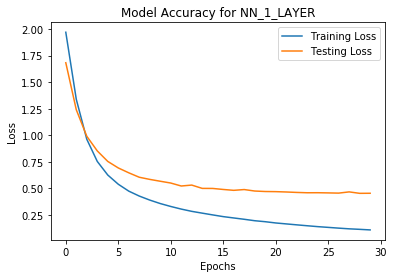

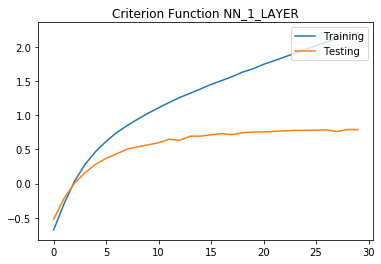

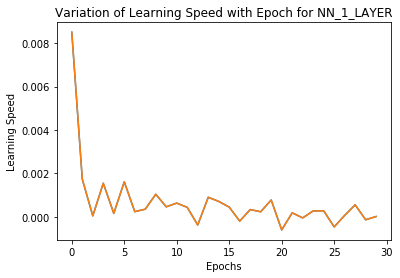

In [10]:
print ("\n\n============ Neural Network with 1 hidden layer without Regularizer ===================\n")
print("\nRegularizer = ", Lambda, "\nLearning Rate = ", learning_rate, "\nNodes in first layer = ", first_layer, "\nNumber of hidden layers = 1", "\nEpochs = ", epochs)
model = createSequentialModel(first_layer, 0, final_layer, 1, image_size, Lambda, learning_rate, False)

accuracies[0,0], history, w11 = fit_ModelAccuracy(model, x_train, y_train, x_test, y_test, epochs, batch_size)
print ("\n\nAccuracy without Regulazier = ", accuracies[0,0]*100)
LS11 = findLearningSpeed(w11)
plotModelHistory(history, 'loss', 'val_loss', 'NN_1_LAYER')
plt.plot(-np.log(history.history['loss']) , label='Training')
plt.plot(-np.log(history.history['val_loss']), label='Testing')
plt.legend(loc = 'upper right')
plt.title("Criterion Function NN_1_LAYER")
plot(LS11, 'Learning Speed', 'NN_1_LAYER')



============ Neural Network with 1 hidden layer with Regularizer ===================



Accuracy with Regularizer =  10.300000011920929


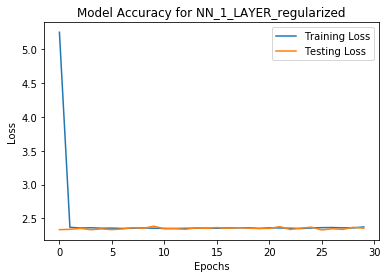

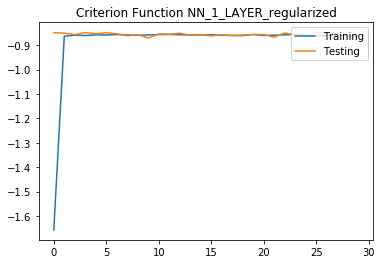

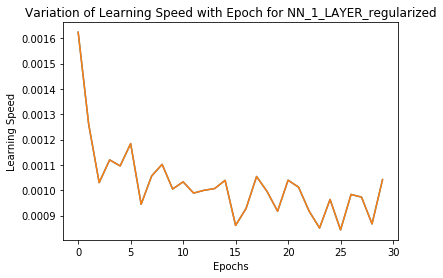

In [11]:
print ("\n\n============ Neural Network with 1 hidden layer with Regularizer ===================\n")

reg_model = createSequentialModel(first_layer, 0, final_layer, 1, image_size, Lambda, learning_rate, True)
accuracies[0,1], reg_history, w12= fit_ModelAccuracy(reg_model, x_train, y_train, x_test, y_test, epochs, batch_size)
print ("\n\nAccuracy with Regularizer = ", accuracies[0,1]*100)
LS12 = findLearningSpeed(w12)
plotModelHistory(reg_history,'loss', 'val_loss', 'NN_1_LAYER_regularized')
plt.plot(-np.log(reg_history.history['loss']) , label='Training')
plt.plot(-np.log(reg_history.history['val_loss']), label='Testing')
plt.legend(loc = 'upper right')
plt.title("Criterion Function NN_1_LAYER_regularized")
plot(LS12, 'Learning Speed', 'NN_1_LAYER_regularized')


#### Neural Network with 2 hidden layers 



============ Neural Network with 2 hidden layers without Regularizer ===================


Regularizer =  5 
Learning Rate =  0.1 
Nodes in first layer =  30 
Number of hidden layers = 2 
Epochs =  30


Accuracy without Regularizer =  82.59999752044678


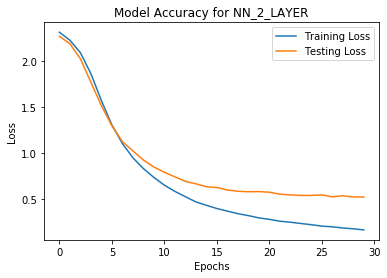

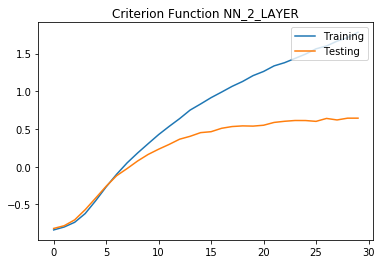

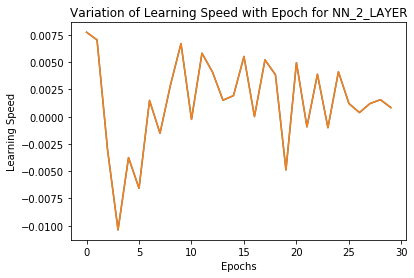

In [12]:
print ("\n\n============ Neural Network with 2 hidden layers without Regularizer ===================\n")
hidden_nodes = 2
middle_layers = 30

print("\nRegularizer = ", Lambda, "\nLearning Rate = ", learning_rate, "\nNodes in first layer = ", first_layer, "\nNumber of hidden layers =",hidden_nodes, "\nEpochs = ", epochs)


model_2 = createSequentialModel(first_layer, middle_layers, final_layer, hidden_nodes, image_size, Lambda, learning_rate, False)
accuracies[1,0], history_2, w21= fit_ModelAccuracy(model_2, x_train, y_train, x_test, y_test, epochs, batch_size)
print ("\n\nAccuracy without Regularizer = ", accuracies[1,0]*100)
LS21 = findLearningSpeed(w21)
plotModelHistory(history_2, 'loss', 'val_loss', 'NN_2_LAYER')
plt.plot(-np.log(history_2.history['loss']) , label='Training')
plt.plot(-np.log(history_2.history['val_loss']), label='Testing')
plt.legend(loc = 'upper right')
plt.title("Criterion Function NN_2_LAYER")
plot(LS21, 'Learning Speed', 'NN_2_LAYER')



============ Neural Network with 2 hidden layers with Regularizer ===================



With Regularizer =  10.000000149011612


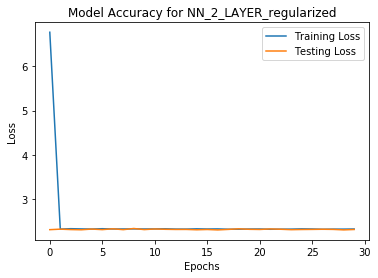

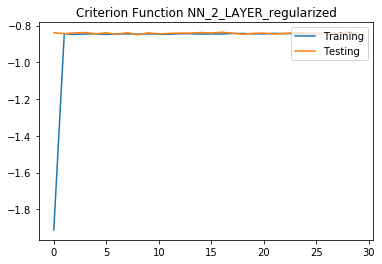

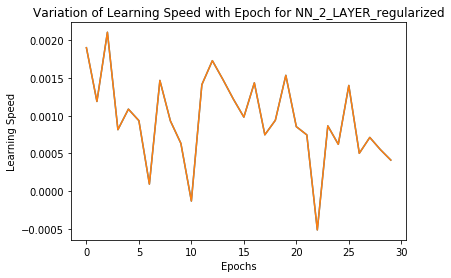

In [13]:
print ("\n\n============ Neural Network with 2 hidden layers with Regularizer ===================\n")

reg_model_2 = createSequentialModel(first_layer, middle_layers, final_layer, hidden_nodes, image_size, Lambda, learning_rate, True)
accuracies[1,1], reg_history_2, w22 = fit_ModelAccuracy(reg_model_2, x_train, y_train, x_test, y_test, epochs, batch_size)
print ("\n\nWith Regularizer = ", accuracies[1,1]*100)
LS22 = findLearningSpeed(w22)
plotModelHistory(reg_history_2,'loss', 'val_loss', 'NN_2_LAYER_regularized')
plt.plot(-np.log(reg_history_2.history['loss']) , label='Training')
plt.plot(-np.log(reg_history_2.history['val_loss']), label='Testing')
plt.legend(loc = 'upper right')
plt.title("Criterion Function NN_2_LAYER_regularized")
plot(LS22, 'Learning Speed', 'NN_2_LAYER_regularized')

#### Neural Network with 3 hidden layers



============ Neural Network with 3 hidden layers without Regularizer ===================


Regularizer =  5 
Learning Rate =  0.1 
Nodes in first layer =  30 
Number of hidden layers = 3 
Epochs =  30


Accuracy without Regularizer =  72.39999771118164


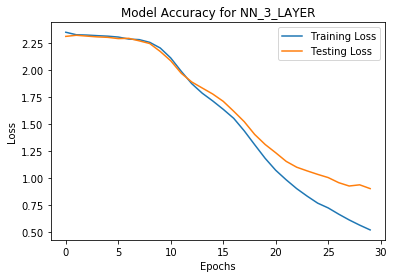

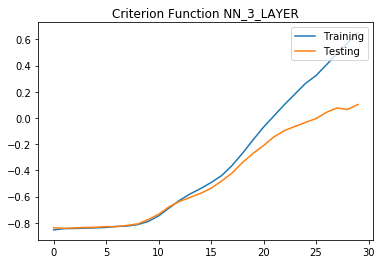

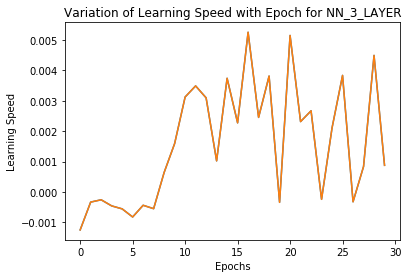

In [14]:
print ("\n\n============ Neural Network with 3 hidden layers without Regularizer ===================\n")
hidden_nodes = 3
middle_layers = 30
print("\nRegularizer = ", Lambda, "\nLearning Rate = ", learning_rate, "\nNodes in first layer = ", first_layer, "\nNumber of hidden layers =",hidden_nodes, "\nEpochs = ", epochs)


model_3 = createSequentialModel(first_layer, middle_layers, final_layer, hidden_nodes, image_size, Lambda, learning_rate, False)
accuracies[2,0], history_3, w31= fit_ModelAccuracy(model_3, x_train, y_train, x_test, y_test, epochs, batch_size)
print ("\n\nAccuracy without Regularizer = ", accuracies[2,0]*100)
LS31 = findLearningSpeed(w31)
plotModelHistory(history_3, 'loss', 'val_loss', 'NN_3_LAYER')
plt.plot(-np.log(history_3.history['loss']) , label='Training')
plt.plot(-np.log(history_3.history['val_loss']), label='Testing')
plt.legend(loc = 'upper right')
plt.title("Criterion Function NN_3_LAYER")
plot(LS31, 'Learning Speed', 'NN_3_LAYER')



============ Neural Network with 3 hidden layers with Regularizer ===================



Accuracy with Regularizer =  10.000000149011612


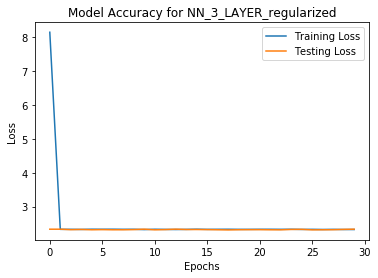

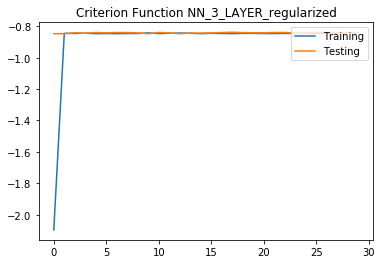

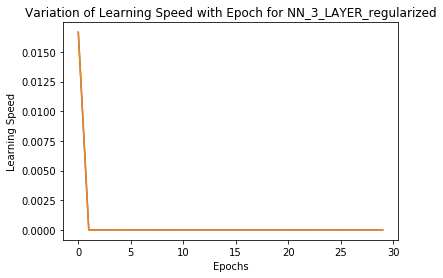

In [15]:
print ("\n\n============ Neural Network with 3 hidden layers with Regularizer ===================\n")

reg_model_3 = createSequentialModel(first_layer, middle_layers, final_layer, hidden_nodes, image_size, Lambda, learning_rate, True)
accuracies[2,1], reg_history_3, w32 = fit_ModelAccuracy(reg_model_3, x_train, y_train, x_test, y_test, epochs, batch_size)
print ("\n\nAccuracy with Regularizer = ", accuracies[2,1]*100)
LS32 = findLearningSpeed(w32)
plotModelHistory(reg_history_3,'loss', 'val_loss', 'NN_3_LAYER_regularized')
plt.plot(-np.log(reg_history_3.history['loss']) , label='Training')
plt.plot(-np.log(reg_history_3.history['val_loss']), label='Testing')
plt.legend(loc = 'upper right')
plt.title("Criterion Function NN_3_LAYER_regularized")
plot(LS32, 'Learning Speed', 'NN_3_LAYER_regularized')

####  Showing all accuracies together 

In [16]:
displayAccuracies(accuracies*100)




Hidden layers           Unregularized            Regularizer
     1                    85.70 %                10.30 %


     2                    82.60 %                10.00 %


     3                    72.40 %                10.00 %




#### Answer to 2(c) - Convolutional Neural Networks

In [17]:
from scipy.ndimage import rotate, shift

from keras.layers import Conv2D, Dropout
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.optimizers import Adam

In [18]:
def create_CNNModel(cnn_inp_shape, num_Classes):
    model = Sequential()
    model.add(Conv2D(32, kernel_size=(3,3), activation='relu', input_shape = cnn_inp_shape))
    model.add(Conv2D(64, (3,3), activation='relu'))
    model.add(MaxPooling2D(pool_size = (2,2)))
    model.add(Dropout(0.25))
    model.add(Flatten())
    model.add(Dense(128, activation='relu')) 
    model.add(Dropout(0.5))
    model.add(Dense(num_Classes, activation='softmax'))
    model.compile(loss = 'categorical_crossentropy', optimizer = Adam(learning_rate = 0.1), metrics=['accuracy'])
    return model

In [19]:
def rotateImg(image, degree):
    new_img = rotate(image, degree,(1,0), reshape=False)
    return new_img.reshape(image.shape[0], image.shape[1], 1)

def shiftImg(image, sequence):
    new_img = shift(image, sequence)
    return new_img.reshape(image.shape[0], image.shape[1], 1)

def augmentImages(x_dataset, y_dataset, degree, shift_pixels):
    augmented = []
    y_augmented = []
    
    
    for index, img in enumerate(x_dataset):
        for i in range(degree):
            deg = i-3
            rot_Img = rotateImg(img, deg)
            
            augmented.append(rot_Img)
            
            y_rot_temp = keras.utils.to_categorical(y_dataset[index], 10)
            y_augmented.append(y_rot_temp)
            
        sh_Img = shiftImg(img, shift_pixels)
        augmented.append(sh_Img)
        y_sh_temp = keras.utils.to_categorical(y_dataset[index], 10)
        y_augmented.append(y_sh_temp)
            
    return np.array(augmented), np.array(y_augmented)

In [20]:
shift_pixels = 3.0
degree = 2*4

################ Augmenting MNIST dataset of 1000 images ######################

x_train_augmented, y_train_augmented = augmentImages(x_train_raw, y_train_raw, degree, shift_pixels)
x_test_augmented, y_test_augmented = augmentImages(x_test_raw, y_test_raw, degree, shift_pixels)

cnn_inp_shape = (image_dim, image_dim, 1)

################ Generate the model ######################

CNN_model = create_CNNModel(cnn_inp_shape, num_Classes)

X_train = x_train_raw.reshape(x_train_raw.shape[0], image_dim, image_dim, 1)
X_test = x_test_raw.reshape(x_test_raw.shape[0], image_dim, image_dim, 1)

################ Train the model on normal images ######################

batch_size = 10
n_epochs = 30
CNN_model_history = CNN_model.fit(X_train, y_train, batch_size=batch_size, epochs=n_epochs, verbose=False, validation_data=(X_test, y_test))

########## Evaluate performance on normal images

cnn_loss, cnn_accuracy = CNN_model.evaluate(X_test, y_test, verbose=0)
print ("\n\nCNN Normal accuracy: ",cnn_accuracy*100,"%")

################ Train the model on augmented images ######################
CNN_model_augmented = CNN_model.fit(x_train_augmented, y_train_augmented, batch_size=batch_size, epochs=n_epochs, verbose=False, validation_data=(x_test_augmented, y_test_augmented))

########## Evaluate performance on augmented images
cnn_loss, cnn_accuracy_augmented = CNN_model.evaluate(x_test_augmented, y_test_augmented, verbose=0)
print ("\n\nAugmented accuracy: ", cnn_accuracy_augmented*100,"%")



CNN Normal accuracy:  10.000000149011612 %


Augmented accuracy:  10.000000149011612 %


#### Conclusion:
1. In Neural Networks, using the hyperparameter, learning rate = 0.1, we get accuracies around 85-86% for all the 1, 2 and 3 hidden layers.
2. As the number of hidden layers increases and the regularizer is passed to every hidden layer, the accuracy goes on decreasing. Further, if the regularizer is set to a large value i.e 5, the accuracy drops considerably to around 10%.
3. While in Convolutional Neural Networks (CNNs), using the same learning rate = 0.1 we obtain accuracies around 10% . 

Now, If we decrease the learning rate to be around 0.01, We see an significant increase in the accuray i.e 93 %
And also after augmenting the images, we increase the size of the datasets and can obtain an accuracy around 94%


#### References: 
1. https://ljvmiranda921.github.io/notebook/2017/08/13/softmax-and-the-negative-log-likelihood/
2. https://stats.stackexchange.com/questions/163388/why-is-the-l2-regularization-equivalent-to-gaussian-prior
3. https://medium.com/tebs-lab/how-to-classify-mnist-digits-with-different-neural-network-architectures-39c75a0f03e3
4. https://keras.io/examples/mnist_cnn/
5. https://www.kaggle.com/fooeta/mnist-challange-cnn-with-data-augmentation
6. https://www.kaggle.com/dhayalkarsahilr/easy-image-augmentation-techniques-for-mnist
